In [1]:
import numpy as np

from attention_utils import get_activations, get_data

np.random.seed(1337)  # for reproducibility
from keras.models import *
from keras.layers import Input, Dense, merge

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
input_dims=32
inputs = Input(shape=(input_dims,))
attention_probs = Dense(input_dims, activation='softmax', name='attention_probs')(inputs)
attention_mul = merge([inputs, attention_probs], output_shape=input_dims, name='attention_mul', mode='mul')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)


In [3]:
import numpy as np

from attention_utils import get_activations, get_data

np.random.seed(1337)  # for reproducibility
from keras.models import *
from keras.layers import Input, Dense, merge

input_dim = 32

In [4]:
def build_model():
    inputs = Input(shape=(input_dim,))

    # ATTENTION PART STARTS HERE
    attention_probs = Dense(input_dim, activation='softmax', name='attention_vec')(inputs)
    attention_mul = merge([inputs, attention_probs], output_shape=32, name='attention_mul', mode='mul')
    # ATTENTION PART FINISHES HERE

    attention_mul = Dense(64)(attention_mul)
    output = Dense(1, activation='sigmoid')(attention_mul)
    model = Model(input=[inputs], output=output)
    return model

In [5]:
if __name__ == '__main__':
    N = 10000
    inputs_1, outputs = get_data(N, input_dim)

    m = build_model()
    

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: UserWarning: The `merge` function is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  
/usr/local/lib/python3.5/dist-packages/keras/legacy/layers.py:465: UserWarning: The `Merge` layer is deprecated and will be removed after 08/2017. Use instead layers from `keras.layers.merge`, e.g. `add`, `concatenate`, etc.
  name=name)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`
  # This is added back by InteractiveShellApp.init_path()


In [11]:
    m.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    print(m.summary())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 32)           0                                            
__________________________________________________________________________________________________
attention_vec (Dense)           (None, 32)           1056        input_2[0][0]                    
__________________________________________________________________________________________________
attention_mul (Merge)           (None, 32)           0           input_2[0][0]                    
                                                                 attention_vec[0][0]              
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 64)           2112        attention_mul[0][0]              
__________

In [13]:
inputs_1.shape

(10000, 32)

In [16]:
[inputs_1]

[array([[-0.70318731,  0.        , -0.32181433, ...,  0.00771784,
          1.47827716, -0.95761463],
        [ 1.32900811,  1.        ,  0.4715572 , ...,  0.30438786,
         -1.0000296 , -2.45641783],
        [ 0.25230702,  0.        , -1.58345465, ..., -1.10066159,
          0.73382966, -0.03157402],
        ...,
        [ 0.82750475,  0.        , -0.35349278, ..., -1.23306337,
         -1.29373762, -1.04762519],
        [ 0.87912132,  1.        ,  0.12923405, ..., -1.02224289,
          0.43915077, -1.28045574],
        [-1.26141756,  0.        , -1.14880172, ...,  0.35026112,
         -0.76943139, -0.53736118]])]

In [33]:
inputs_1.shape

(10000, 32)

In [7]:
    m.fit([inputs_1], outputs, epochs=20, batch_size=64, validation_split=0.5)

Train on 5000 samples, validate on 5000 samples
Epoch 1/20
5000/5000 [==============================] - 0s 58us/step - loss: 0.6821 - acc: 0.6236 - val_loss: 0.6697 - val_acc: 0.6956
Epoch 2/20
5000/5000 [==============================] - 0s 31us/step - loss: 0.6381 - acc: 0.7474 - val_loss: 0.6010 - val_acc: 0.7830
Epoch 3/20
5000/5000 [==============================] - 0s 33us/step - loss: 0.5423 - acc: 0.7986 - val_loss: 0.4936 - val_acc: 0.8154
Epoch 4/20
5000/5000 [==============================] - 0s 32us/step - loss: 0.4289 - acc: 0.8406 - val_loss: 0.3853 - val_acc: 0.8652
Epoch 5/20
5000/5000 [==============================] - 0s 32us/step - loss: 0.3150 - acc: 0.8896 - val_loss: 0.2715 - val_acc: 0.9024
Epoch 6/20
5000/5000 [==============================] - 0s 27us/step - loss: 0.1993 - acc: 0.9470 - val_loss: 0.1573 - val_acc: 0.9596
Epoch 7/20
5000/5000 [==============================] - 0s 31us/step - loss: 0.0992 - acc: 0.9844 - val_loss: 0.0700 - val_acc: 0.9900
Epoch 8

In [17]:
    testing_inputs_1, testing_outputs = get_data(1, input_dim)

In [29]:
testing_inputs_1.shape

(1, 32)

In [21]:
testing_outputs

array([[0]])

In [22]:
    a, b = get_data(1000, input_dim)

In [25]:
a[0].shape

(32,)

In [27]:
b.shape

(1000, 1)

In [28]:
testing_inputs_1.shape

(1, 32)

In [8]:
    # Attention vector corresponds to the second matrix.
    # The first one is the Inputs output.
    attention_vector = get_activations(m, testing_inputs_1,
                                       print_shape_only=True,
                                       layer_name='attention_vec')[0].flatten()

----- activations -----
(1, 32)


In [30]:
    print('attention =', attention_vector)

attention = [0.01149514 0.5267873  0.00756128 0.01149909 0.0242379  0.01212288
 0.04356962 0.0070608  0.02107378 0.01616836 0.00856798 0.01050257
 0.00966695 0.01578217 0.02054093 0.01533068 0.00677156 0.01053648
 0.01014201 0.00951308 0.01209557 0.04221773 0.01706385 0.00788329
 0.01000346 0.01663797 0.01594869 0.01538588 0.00839889 0.0202841
 0.02436536 0.01078465]


In [31]:
attention_vector.shape

(32,)

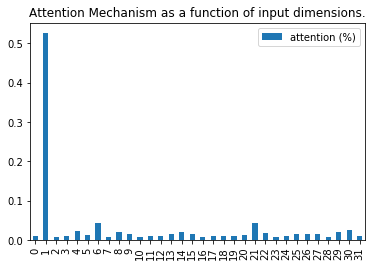

In [32]:
    # plot part.
    import matplotlib.pyplot as plt
    import pandas as pd

    pd.DataFrame(attention_vector, columns=['attention (%)']).plot(kind='bar',
                                                                   title='Attention Mechanism as '
                                                                         'a function of input'
                                                                         ' dimensions.')
    plt.show()